## **Task-1 Iris Flower Classification**

1. Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements.
2. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [64]:
# Reading data

data = pd.read_csv("/content/Iris.csv", encoding_errors='ignore')
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [65]:
# Dataset Summary or Information
def data_summary(data):
  print("---------------------------------------------------------------------------------")
  print("The data has {} records and {} columns.".format(data.shape[0],  data.shape[1]))
  print("---------------------------------------------------------------------------------")
  print("The Information of data:", data.info())
  print("---------------------------------------------------------------------------------")
  print("The data description:\n", data.describe())
  print("---------------------------------------------------------------------------------")
  print("The Null Count check on data:\n", data.isnull().sum())
  print("---------------------------------------------------------------------------------")
  print("The top 5 records from data\n", data.head())

print(data_summary(data))

---------------------------------------------------------------------------------
The data has 150 records and 6 columns.
---------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
The Information of data: None
---------------------------------------------------------------------------------
The data description:
                Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    15

**Observation**

* We can see that we have total 6 columns in data
* The data seems to be clean as it does not have null values
* The Average sepal length 6 cm, sepal width 3 cm, petal length is 3.75 cm and petal width 1.2 cm.

## **EDA**

1. Uni-variate Analysis

In [66]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

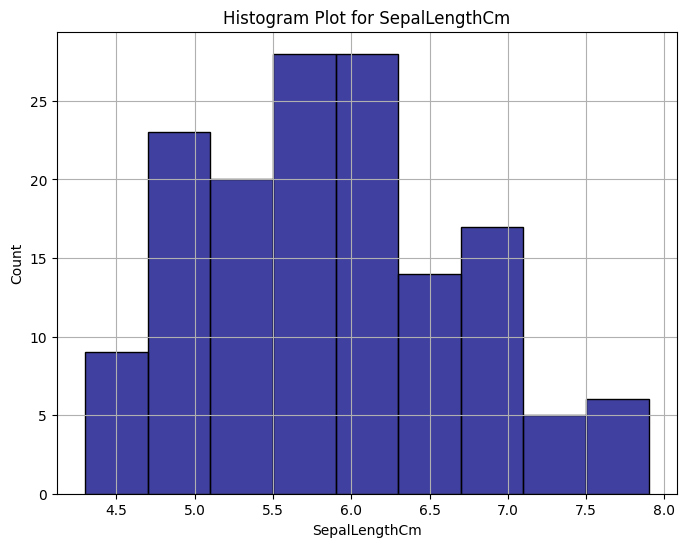

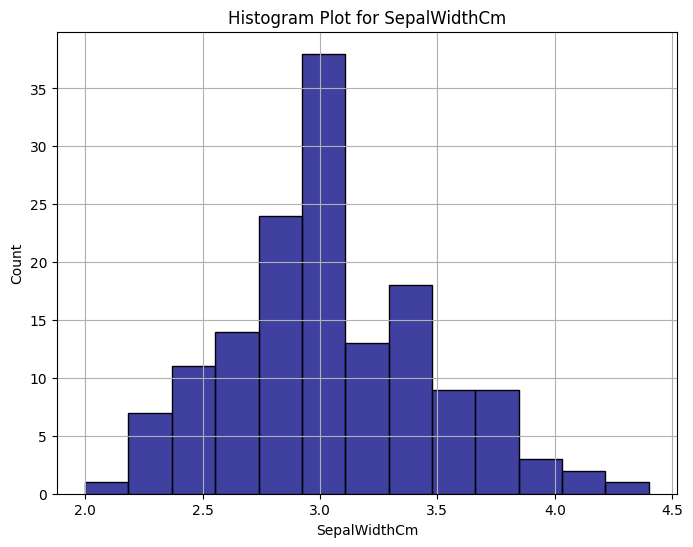

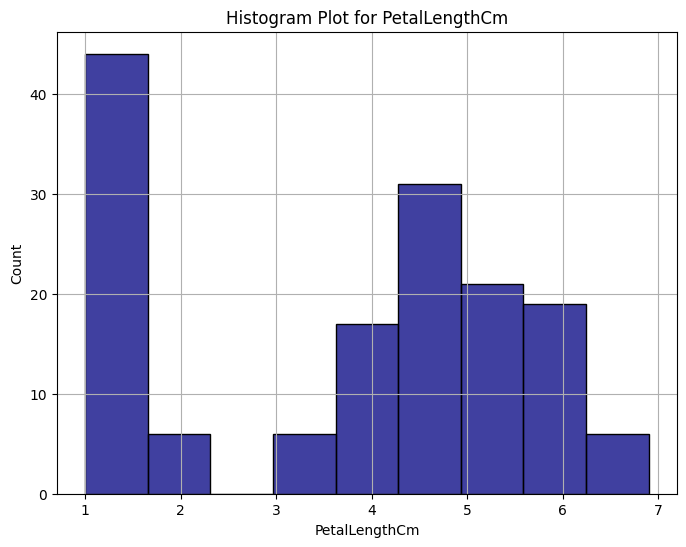

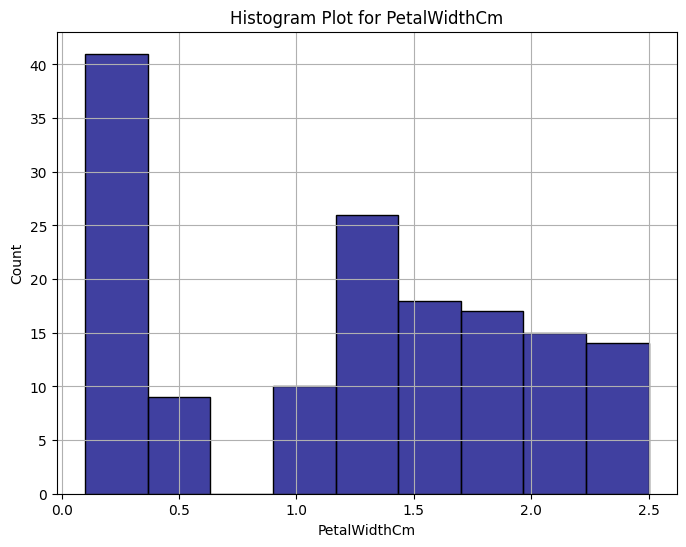

In [67]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for col in cols:
  plt.figure(figsize=[8,6])
  sns.histplot(data=data, x = col, color='navy')
  plt.title(f"Histogram Plot for {col}")
  plt.grid()
  plt.show()

In [68]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We can perform an analysis for each Species separately identify what are it's different characteristics.

**1. Iris-setosa species**

In [69]:
setosa_spec = data[data['Species']=='Iris-setosa']
setosa_spec.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
setosa_spec.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,25.50000,5.00600,3.418000,1.464000,0.24400
std,14.57738,0.35249,0.381024,0.173511,0.10721
min,1.00000,4.30000,2.300000,1.000000,0.10000
25%,13.25000,4.80000,3.125000,1.400000,0.20000
50%,25.50000,5.00000,3.400000,1.500000,0.20000
75%,37.75000,5.20000,3.675000,1.575000,0.30000
max,50.00000,5.80000,4.400000,1.900000,0.60000


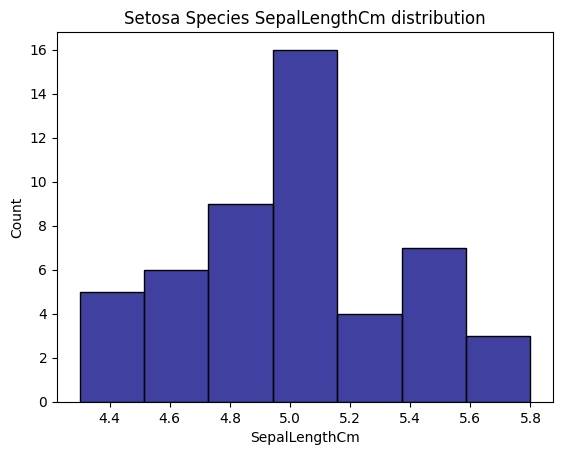

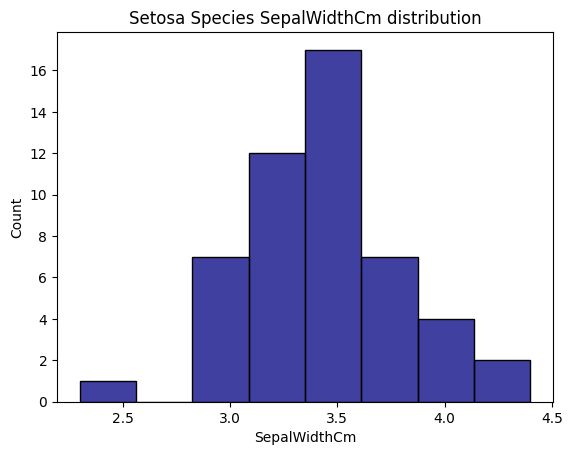

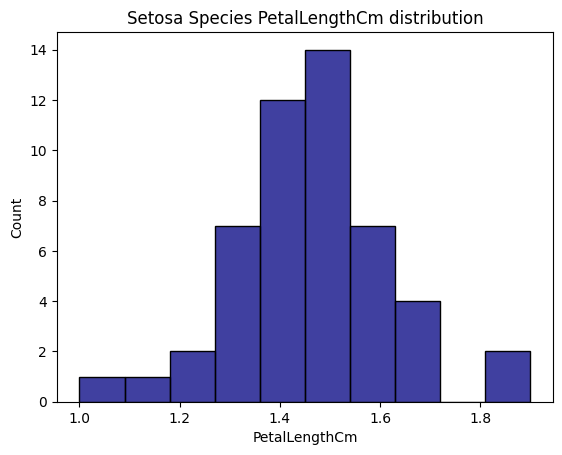

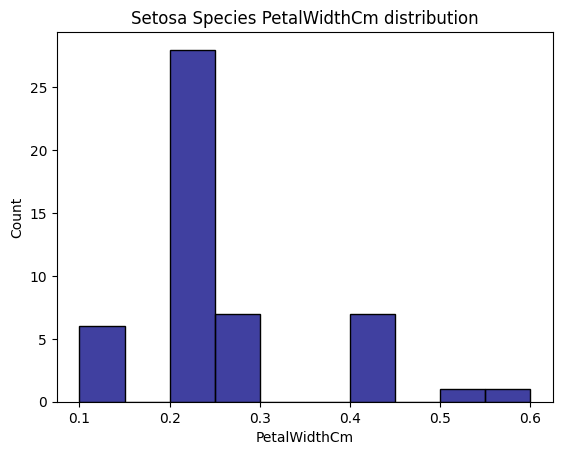

In [71]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for col in cols:
  sns.histplot(data=setosa_spec, x=col, color='navy')
  plt.title(f"Setosa Species {col} distribution")
  plt.show();

### **Observations for Setosa Species of Flowers:**

* The average sepal length is 5 cm, sepal width is 3.4 cm, petal length is 1.5 cm and petal width is 0.25 cm.
* The standard deviation for Sepal Length is about 0.35 cm. It means that the sepal length of flowers can be a little higher or lower than the average value of 5.006 cm.
* The 25th percentile for Petal Length is 1.4 cm. It means that 25% of the flowers have a petal length of 1.4 cm or less.
* The median for Sepal Length is 5.0 cm. It means that half of the flowers have a sepal length of 5.0 cm or less, and the other half have a length of 5.0 cm or more.
* The 75th percentile for Petal Width is 0.3 cm. It means that 75% of the flowers have a petal width of 0.3 cm or less.

**2. Iris-versicolor species**

In [72]:
versicolor_spec = data[data['Species']=='Iris-versicolor']
versicolor_spec.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [73]:
versicolor_spec.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,75.50000,5.936000,2.770000,4.260000,1.326000
std,14.57738,0.516171,0.313798,0.469911,0.197753
min,51.00000,4.900000,2.000000,3.000000,1.000000
25%,63.25000,5.600000,2.525000,4.000000,1.200000
50%,75.50000,5.900000,2.800000,4.350000,1.300000
75%,87.75000,6.300000,3.000000,4.600000,1.500000
max,100.00000,7.000000,3.400000,5.100000,1.800000


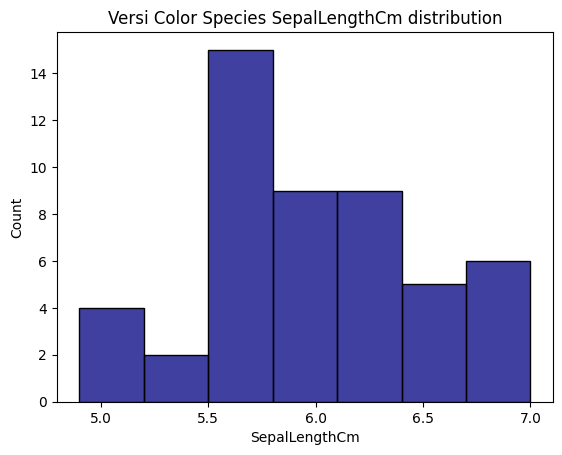

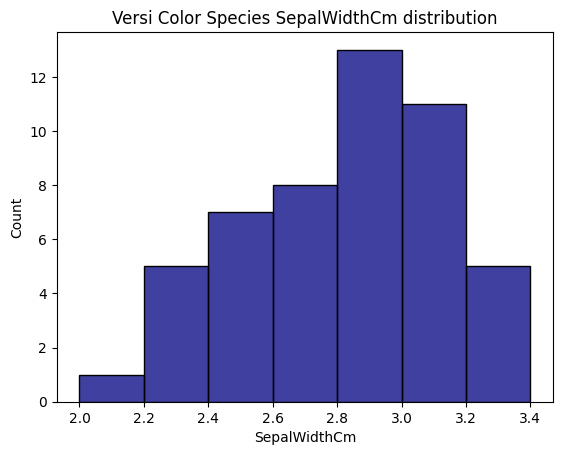

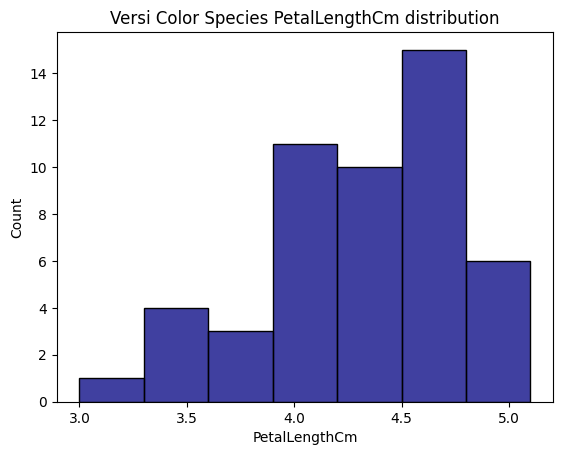

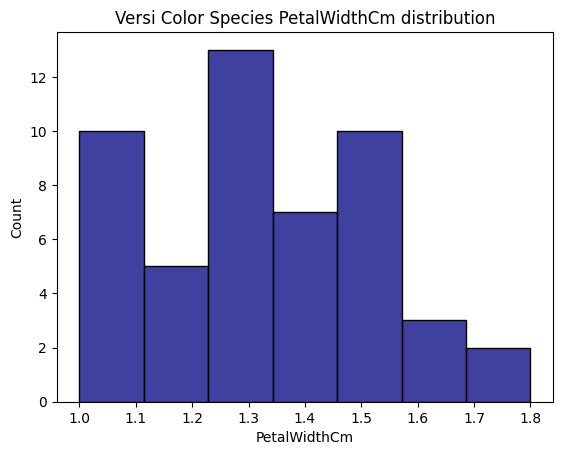

In [74]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for col in cols:
  sns.histplot(data=versicolor_spec, x=col, color='navy')
  plt.title(f"Versi Color Species {col} distribution")
  plt.show();

### **Observations for Versicolor Species of Flowers:**

* The average values of the versicolor flower measurements are Sepal Length: 6 cm, Sepal Width: 2.7 cm, Petal Length: 4.3 cm, Petal Width: 1.3 cm.
* The standard deviation for Sepal Length is about 0.52 cm. It means that the sepal length of flowers can be a little higher or lower than the average value of 5.936 cm.
* The 25th percentile for Petal Length is 4.0 cm. It means that 25% of the flowers have a petal length of 4.0 cm or less.
* The median for Sepal Length is 5.9 cm. It means that half of the flowers have a sepal length of 5.9 cm or less, and the other half have a length of 5.9 cm or more.
* The 75th percentile for Petal Width is 1.5 cm. It means that 75% of the flowers have a petal width of 1.5 cm or less.

**3. Iris-virginica species**

In [75]:
virginica_spec = data[data['Species']=='Iris-virginica']
virginica_spec.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
103,104,6.3,2.9,5.6,1.8,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica


In [76]:
virginica_spec.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,125.50000,6.58800,2.974000,5.552000,2.02600
std,14.57738,0.63588,0.322497,0.551895,0.27465
min,101.00000,4.90000,2.200000,4.500000,1.40000
25%,113.25000,6.22500,2.800000,5.100000,1.80000
50%,125.50000,6.50000,3.000000,5.550000,2.00000
75%,137.75000,6.90000,3.175000,5.875000,2.30000
max,150.00000,7.90000,3.800000,6.900000,2.50000


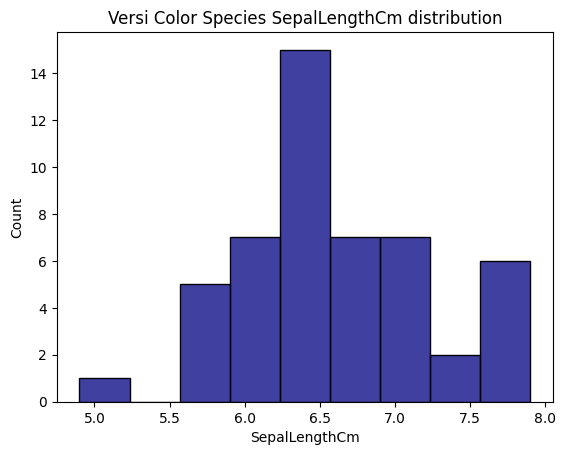

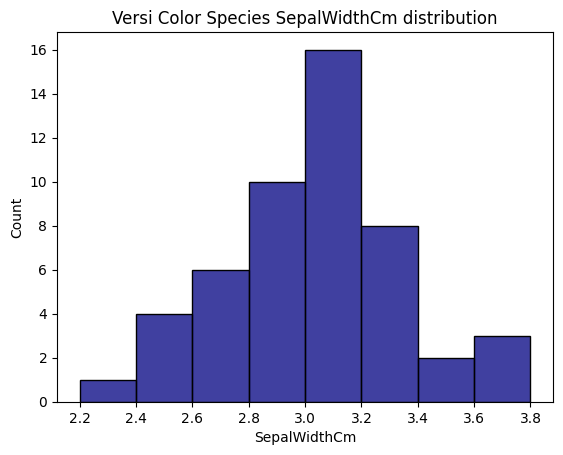

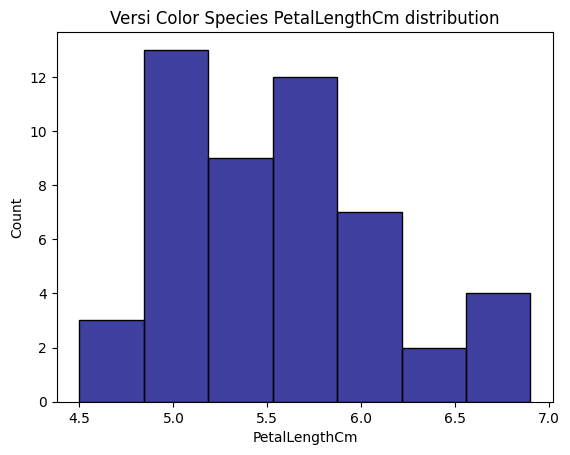

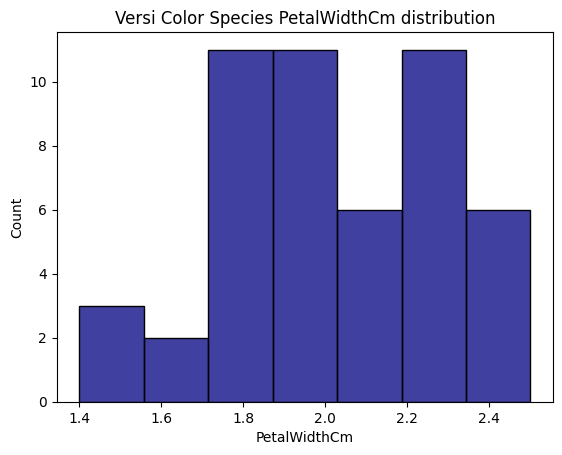

In [77]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

for col in cols:
  sns.histplot(data=virginica_spec, x=col, color='navy')
  plt.title(f"Versi Color Species {col} distribution")
  plt.show();

### **Observations for Iris Virginica Species of Flowers:**

* On average, the Virginica flowers have measurements as Sepal Length: 6.6 cm, Sepal Width: 3.0 cm, Petal Length: 5.5 cm, Petal Width: 2.0 cm.
* The standard deviation for Sepal Length is about 0.64 cm. It means that the sepal length of flowers can be a little higher or lower than the average value of 6.588 cm.
* The 25th percentile for Petal Length is 5.1 cm. It means that 25% of the flowers have a petal length of 5.1 cm or less.
* The median for Sepal Length is 6.5 cm. It means that half of the flowers have a sepal length of 6.5 cm or less, and the other half have a length of 6.5 cm or more.
*  The 75th percentile for Petal Width is 2.3 cm. It means that 75% of the flowers have a petal width of 2.3 cm or less.

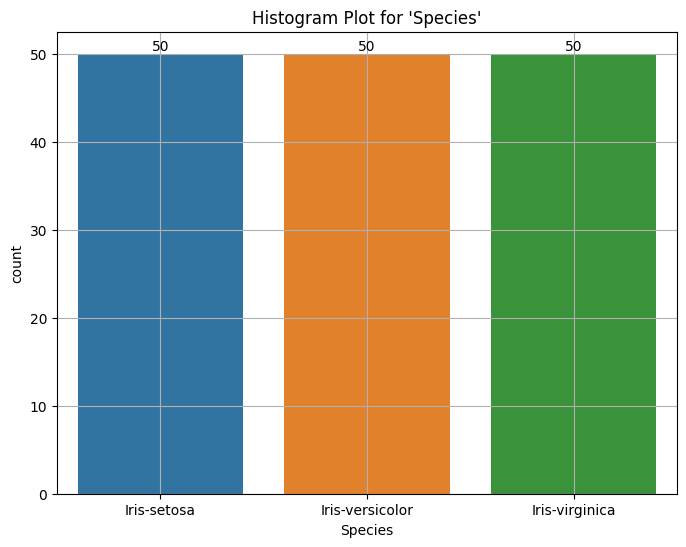

In [78]:
plt.figure(figsize=[8,6])
ax = sns.countplot(data=data, x ='Species')
ax.bar_label(ax.containers[0])
plt.title("Histogram Plot for 'Species'")
plt.grid()
plt.show()

*   Our Data is balanced



<ipython-input-79-b699050ce883>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

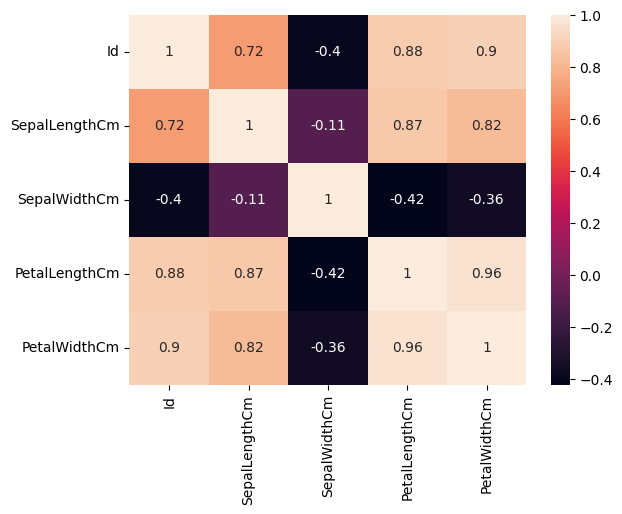

In [79]:
sns.heatmap(data.corr(), annot=True)

## **Label Encoding**

In [80]:
encoder = LabelEncoder()

data['Species'] = encoder.fit_transform(data['Species'])

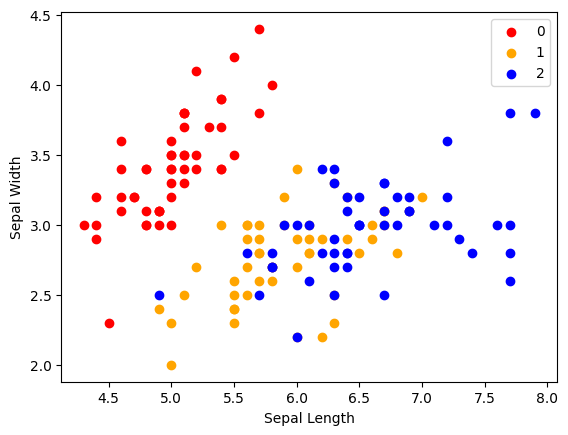

In [81]:
# Plotting scatterplots to visualize relationships between features
colors = ['red', 'orange', 'blue']
species = [0, 1, 2]

# Scatter plot for Sepal Length vs Sepal Width
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

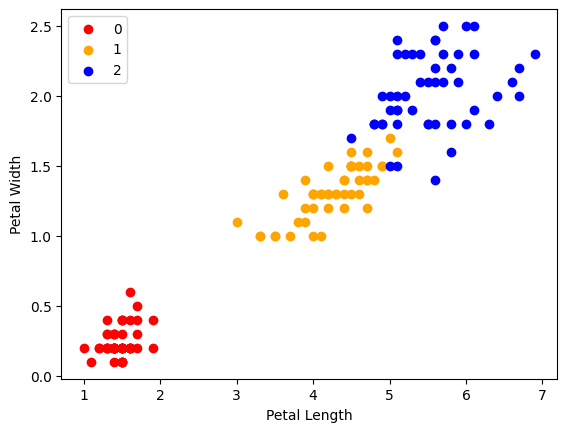

In [82]:
# Scatter plot for Petal Length vs Petal Width
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

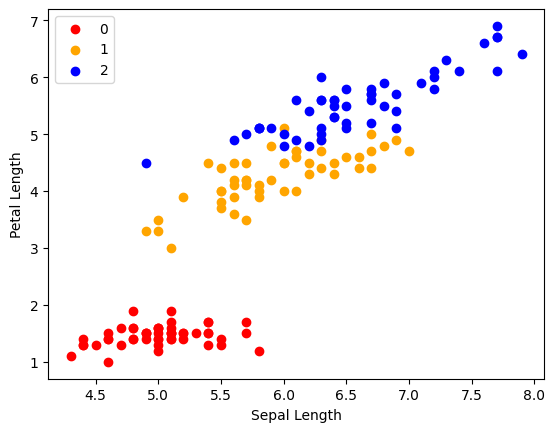

In [83]:
# Scatter plot for Petal Length vs Sepal Length
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()
plt.show()

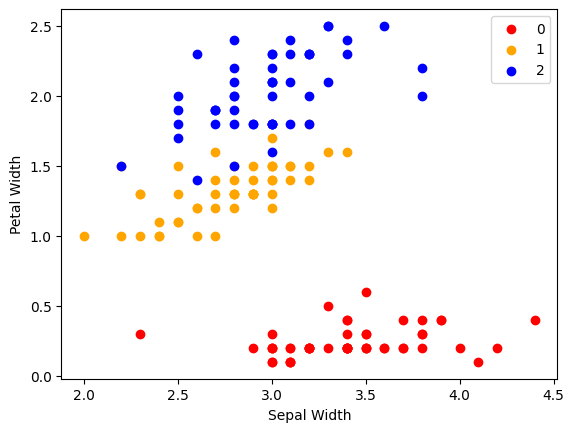

In [84]:
# Scatter plot for Sepal Width vs Petal Width
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()
plt.show()

In [85]:
# Train Test Split for data
X = data.drop(columns = ["Id", "Species"], axis = 1)
y = data['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [86]:
# Lets check shape of our train and test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

## **Modelling**

### **1. Logistic Regression**

In [87]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred_log_reg = model1.predict(X_test)
print("Accuracy of Logistic Regression model is: ", accuracy_score(y_pred_log_reg, y_test) * 100)

Accuracy of Logistic Regression model is:  97.36842105263158


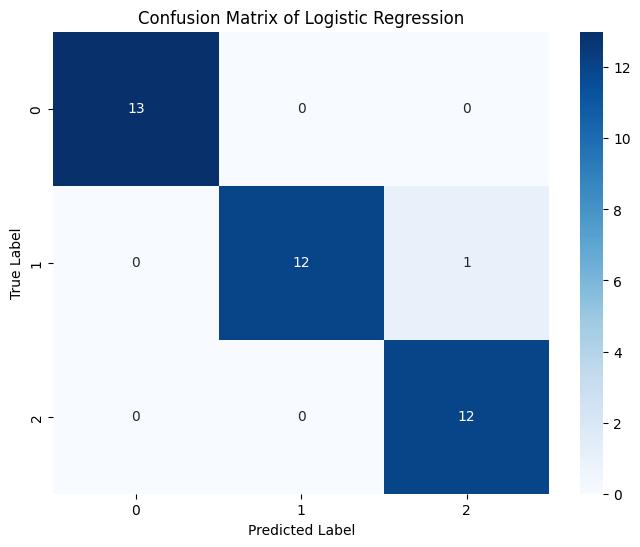

In [88]:
# Confusion Matrix for Logistic Regression
conf_matrix1 = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

### **2. KNN Model**

In [89]:
# K-nearest Neighbours Model (KNN)
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
y_pred_knn = model2.predict(X_test)
print("Accuracy of KNN model is: ", accuracy_score(y_pred_knn, y_test) * 100)

Accuracy of KNN model is:  94.73684210526315


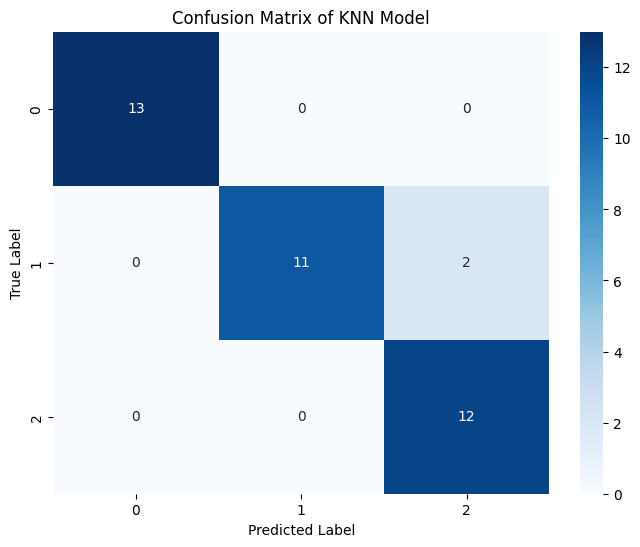

In [90]:
# Confusion Matrix for Knn model
conf_matrix2 = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN Model')
plt.show()

### **3. Decision Tree Model**

In [91]:
# Decision Tree Model

model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
y_pred_dtree = model3.predict(X_test)
print("Accuracy of dtree model is: ", accuracy_score(y_pred_dtree, y_test) * 100)

Accuracy of dtree model is:  92.10526315789474


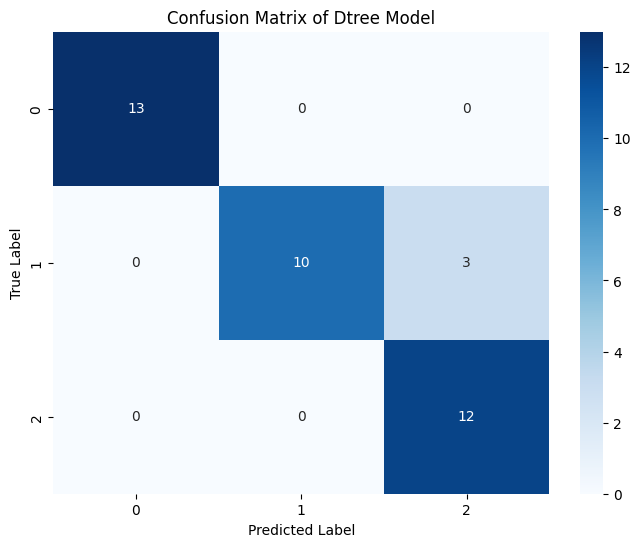

In [92]:
# Confusion Matrix for Knn model
conf_matrix3 = confusion_matrix(y_test, y_pred_dtree)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Dtree Model')
plt.show()

In [93]:
pd.DataFrame({'Models': ['Logistic Regresion',
                         'K Nearest Neighbors',
                         'Decision Tree'],
              'Accuracy Scores': [accuracy_score(y_pred_log_reg, y_test) * 100,
                                  accuracy_score(y_pred_knn, y_test) * 100,
                                  accuracy_score(y_pred_dtree, y_test) * 100]})

,Models,Accuracy Scores
0,Logistic Regresion,97.368421
1,K Nearest Neighbors,94.736842
2,Decision Tree,92.105263


**Conclusion**

* Logistic Regresion Model turns to be best performing model amongst all three with 97.36 % accuracy.